In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-11-12 13:39:15--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0 [following]
--2024-11-12 13:39:16--  https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4e20acdecb9da187c7496cc8e.dl.dropboxusercontent.com/cd/0/inline/CeNP11QnPZ59NZMTaEULtOtuY-rOioFpJrdIsT0FjGzLMDbv33AmE8dFVo_KHEfVXSvnjamkgB5d1nxf-0ZvexEHKHdEhrk0RefIoQqpGjblbtvSO8l6CO8-ua-ro88u24C0N_Ni3JJPAwpCPE9Oe39c/file# [following]
--2024-11-12 13:39:17--  https://uca4e20acdecb9da187c7496cc8e.dl.dropboxusercontent.com/c

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy


#  Building our Model To train the data

In [4]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

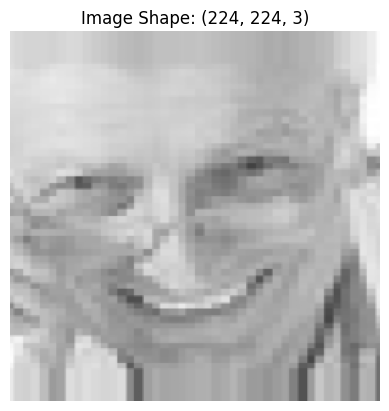

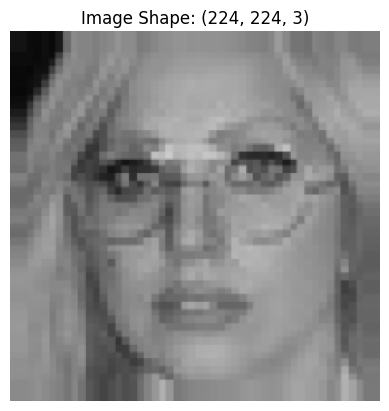

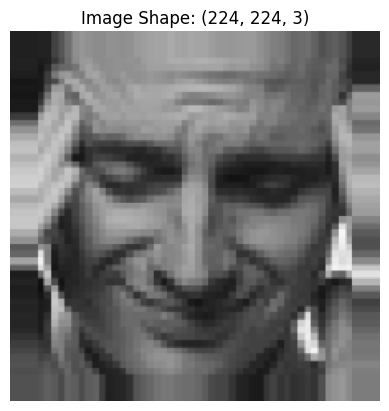

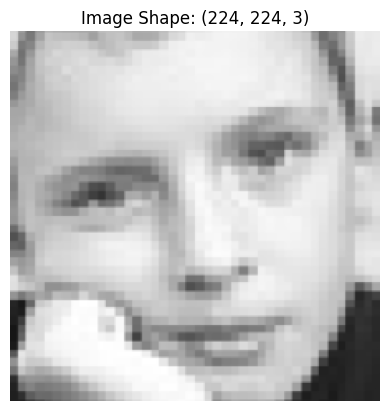

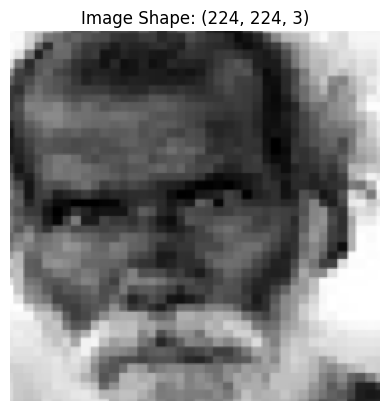

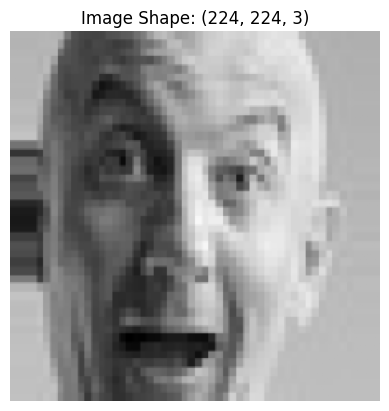

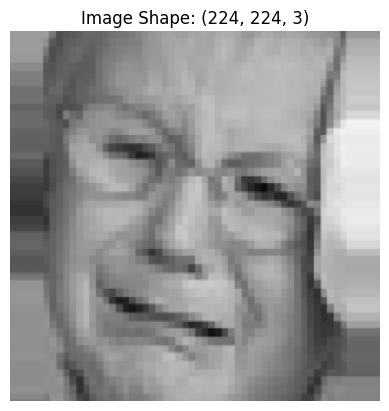

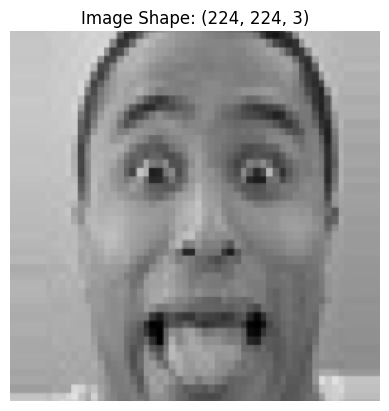

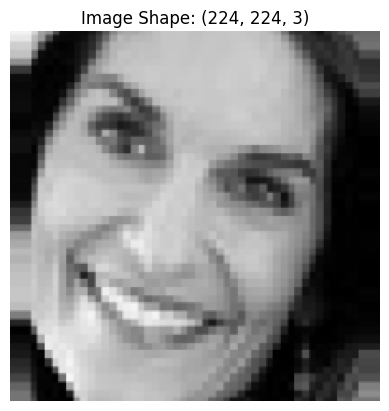

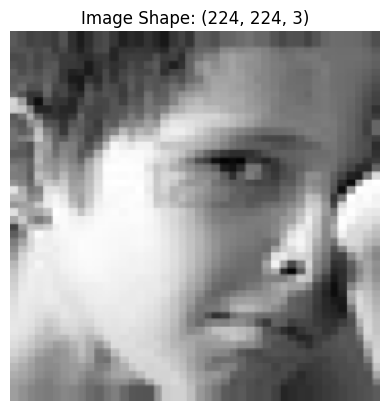

In [8]:
# Fetch a batch of images and their corresponding labels
t_img, label = next(train_data)  # Using Python's built-in iterator functionality

# Function to plot images from the training data generator
def plotImages(img_arr, label):
    """
    input  :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(f"Image Shape: {im.shape}")
        plt.axis('off')  # Correctly disables axis
        plt.show()

        count += 1
        if count == 10:  # Limit the number of images to show
            break

# Call the function to plot the images
plotImages(t_img, label)



# having early stopping and model check point

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Model checkpoint
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Putting callback in a list
call_back = [es, mc]


In [10]:
hist = model.fit(
    train_data,  # Use train_data generator directly
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,  # Use validation data generator directly
    validation_steps=8,
    callbacks=[es, mc]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.1983 - loss: 18.2837
Epoch 1: val_accuracy improved from -inf to 0.33203, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 724ms/step - accuracy: 0.2021 - loss: 18.4176 - val_accuracy: 0.3320 - val_loss: 10.9056
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.1601 - loss: 12.8601
Epoch 2: val_accuracy did not improve from 0.33203
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.1654 - loss: 12.7689 - val_accuracy: 0.2812 - val_loss: 14.4448
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3220 - loss: 11.5931
Epoch 3: val_accuracy did not improve from 0.33203
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.3195 - loss: 11.5218 - val_accuracy: 0.2773 - val_loss: 9.4560
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.3274 - loss: 8.8369
Epoch 4: val_accuracy did not improve from 0.33203
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 695ms/step - accuracy: 0.3292 - loss: 

In [11]:
import os
print(os.listdir('/content'))  # Lists files in /content directory


['.config', 'best_model.keras', 'dataset.zip?dl=0', 'test', 'train', 'sample_data']


In [12]:
from keras.models import load_model

# Load the pre-trained model
model = load_model('/content/best_model.keras')





In [13]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

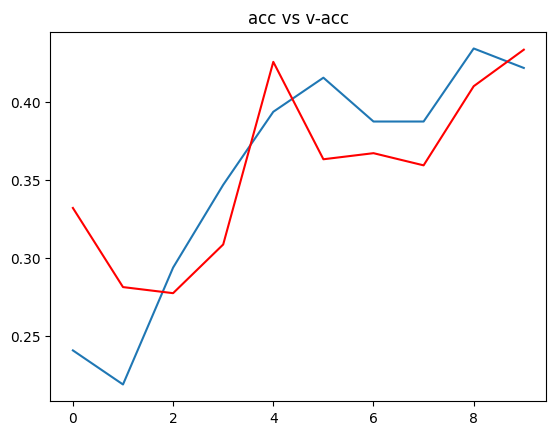

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

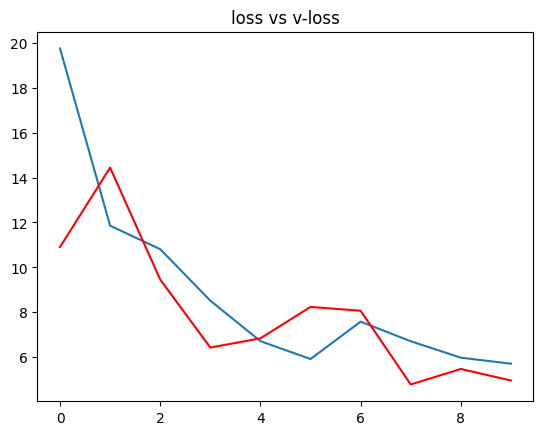

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [17]:
# path for the image to see if it predics correct class

path = "/Passport_Photo.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of neutral")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Passport_Photo.jpeg'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns





Found 7178 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.59375
Precision: 1.0
Recall: 0.59375
F1 Score: 0.7450980392156863


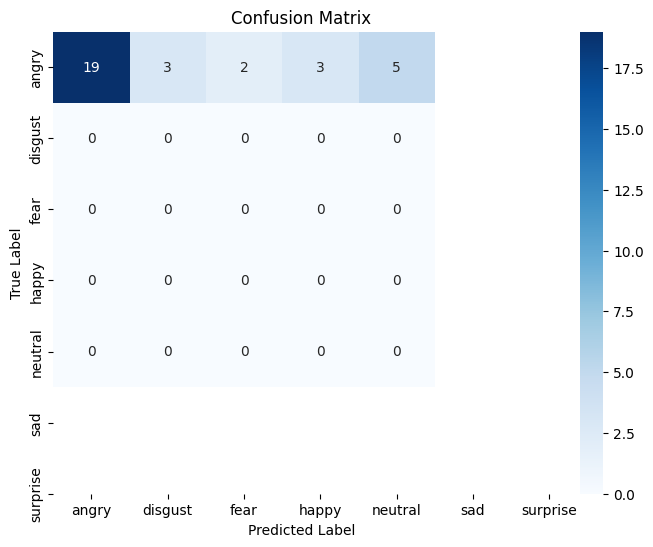

In [19]:
# Define the correct image size based on your model's input shape
img_height = 224  # Update to match the input shape of your model
img_width = 224   # Update to match the input shape of your model
batch_size = 32   # Keep the batch size as per your needs

# Load the pre-trained model
model = load_model('best_model.keras')

# Load and preprocess test data with the correct image size
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    '/content/test',
    target_size=(img_height, img_width),  # Ensure that target_size matches the model's input size
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the test data and labels
X_test, y_test = test_generator.__next__()

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Now calculate metrics as before
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
